In [1]:
import time      # for testing use only
import os         # for testing use only

from bs4 import BeautifulSoup as bs
import pandas as pd
import scipy as sc
import numpy as np
import requests
from lxml import html
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import gmplot
import matplotlib.image as mpimg
from IPython.display import IFrame

%matplotlib inline

In [2]:
df = pd.read_csv('cleanData.csv')
df

,Name,Location,Vegetarian,Gluten,FoodRating,ServiceFood,ValueFood,RankingInArea,Ratings,CuisineCount,...,Origin,Type,"latitude, longitude",SVF,Res_SVF,rating_bool,price_bool,if_success,locRat,OriginRat
0,Burger & Lobster,Midtown West,0,0,4.5,4.5,4.5,129,4.5,2,...,American,Seafood,40.7644228-73.9923918,4.500000,1,1,0,1,1,1
1,Club A Steakhouse,Flatiron District,0,1,4.5,4.5,4.5,1,4.5,2,...,American,Steakhouse,40.7410722-73.9896534,4.500000,1,1,1,1,0,1
2,Au Za'atar,Midtown East,0,0,4.5,4.0,4.0,2,4.5,2,...,Lebanese,Mediterranean,40.7598219-73.9724708,4.166667,1,1,0,1,1,0
3,Boucherie Union Square,Downtown Manhattan,0,1,4.5,4.5,4.0,3,4.5,2,...,French,Steakhouse,40.7130418-74.0139589,4.333333,1,1,1,1,1,1
4,Mei Jin Ramen,Flatiron District,0,0,4.5,4.5,4.5,4,4.5,2,...,Japanese,Asian,40.7410722-73.9896534,4.500000,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5909,Quality Meats,Greenwich Village,0,1,4.5,4.5,4.0,471,4.5,2,...,American,Steakhouse,40.7335844-74.0028172,4.333333,1,1,1,1,1,1
5910,Il Punto,East Harlem,0,0,4.5,4.5,4.0,45,4.5,2,...,Italian,Mediterranean,40.7947222-73.9425,4.333333,1,1,0,1,0,1
5911,Smith & Wollensky,Morningside Heights,0,1,4.0,4.0,3.5,838,4.0,2,...,American,Steakhouse,40.81-73.9625,3.833333,0,0,1,0,0,1
5912,Chocolat Restaurant & Bar,Upper West Side,0,0,4.0,3.5,3.5,"4,053",3.5,2,...,American,Barbecue,40.782832-73.978328,3.666667,0,0,0,0,0,1


In [3]:
# declare the center of the map, and how much we want the map zoomed in
gmap = gmplot.GoogleMapPlotter(0, 0, 2)
# plot heatmap
gmap.heatmap(latitude, longitude)
gmap.scatter(latitude, longitude, c='r', marker=True)
# save it to html
gmap.draw('Newmap.html')

NameError: name 'latitude' is not defined

In [42]:
gVSv = pd.crosstab(df['Gluten'], df['Vegetarian'], normalize='index')
gVSv

Vegetarian,0,1
Gluten,,
0,0.677930,0.322070
1,0.662857,0.337143


Text(0, 0.5, 'Vegetarian')

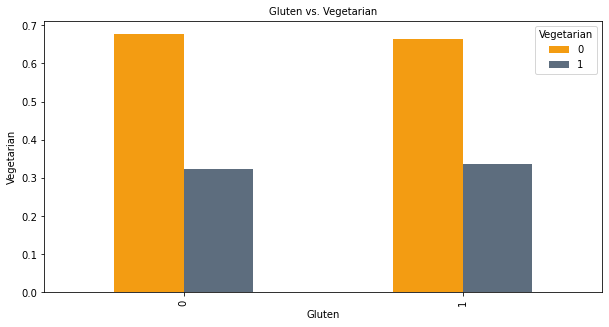

In [43]:
gVSv.plot(kind ='bar', figsize=(10,5), color=['#F39C12', '#5D6D7E'])
plt.title('Gluten vs. Vegetarian', fontsize=10)
plt.xlabel('Gluten')
plt.ylabel('Vegetarian')

<AxesSubplot:xlabel='Ratings'>

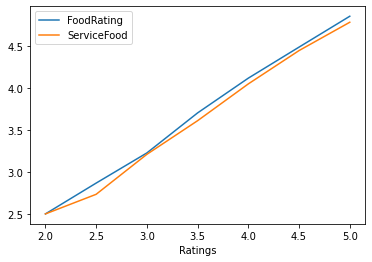

In [28]:
lineplot = df.groupby(['Ratings']).mean()[['FoodRating', 'ServiceFood']]
lineplot.plot()

<AxesSubplot:xlabel='Type'>

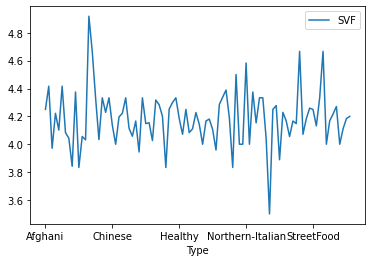

In [41]:
lineplot3 = df.groupby(['Type']).mean()[['SVF']]
lineplot3.plot()

In [46]:
grouped_types=df.groupby('Type',as_index=False)[['Location']].count().sort_values(ascending=False,by='Location')
grouped_types

,Type,Location
7,Bar,579
4,Asian,408
63,Pizza,325
53,Mediterranean,313
79,Steakhouse,239
...,...,...
15,Canadian,1
64,Polish,1
65,Portuguese,1
14,Cambodian,1
